In [1]:
import numpy as np
import time
from copy import deepcopy

import qiskit 
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister, Aer
from qiskit.quantum_info import state_fidelity
from qiskit.providers.aer import noise
from qiskit.visualization import iplot_state_city
from qiskit.tools.qi.qi import *

import qiskit.ignis.verification.tomography as tomo
#from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter, ProcessTomographyFitter
import qiskit.ignis.mitigation.measurement as mc

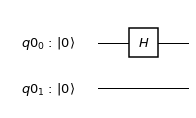

In [2]:
q = QuantumRegister(2)
circ = QuantumCircuit(q)
circ.h(q[0])
circ.draw(output='mpl')

In [3]:
#matrix before anything is changed
job = qiskit.execute(circ, Aer.get_backend('unitary_simulator'))
ideal_unitary = job.result().get_unitary(circ)
print(ideal_unitary)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j -0.70710678+0.j]]


In [4]:
#visualization of original density matrix
iplot_state_city(ideal_unitary)

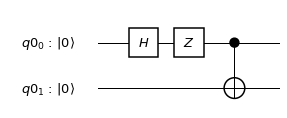

In [5]:
qc = deepcopy(circ)
qc.z(q[0])
qc.cx(q[0],q[1])
qc.draw(output='mpl')

In [6]:
#matrix after black box change is made
job = qiskit.execute(qc, Aer.get_backend('unitary_simulator'))
ideal_unitary2 = job.result().get_unitary(qc)
print(ideal_unitary2)

[[ 0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j -0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [-0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]]


In [7]:
#visualization of altered density matrix
iplot_state_city(ideal_unitary2)

In [8]:
job = qiskit.execute(circ, Aer.get_backend('unitary_simulator'))
U = job.result().get_unitary(circ)
choi_ideal = outer(U.ravel(order='F'))
qst = tomo.process_tomography_circuits(circ, q)
job = qiskit.execute(qst, Aer.get_backend('qasm_simulator'),shots=5000)
tomo_fit = tomo.ProcessTomographyFitter(job.result(), qst)
choi_mle = tomo_fit.fit(method='lstsq').data

In [9]:
choi_ideal = outer(ideal_unitary.ravel(order='F'))
print("Ideal Unitary Done")
print(choi_ideal)

Ideal Unitary Done
[[ 0.5+0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j -0.5-0.j  0. +0.j  0. +0.j
   0. +0.j  0. +0.j  0.5+0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j -0.5-0.j]
 [ 0.5+0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j -0.5-0.j  0. +0.j  0. +0.j
   0. +0.j  0. +0.j  0.5+0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j -0.5-0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. -0.j  0. +0.j  0. +0.j
   0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. -0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. -0.j  0. +0.j  0. +0.j
   0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. -0.j]
 [ 0.5+0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j -0.5-0.j  0. +0.j  0. +0.j
   0. +0.j  0. +0.j  0.5+0.j  0.5+0.j  0. +0.j  0. +0.j  0.5+0.j -0.5-0.j]
 [-0.5+0.j -0.5+0.j  0. +0.j  0. +0.j -0.5+0.j  0.5+0.j  0. +0.j  0. +0.j
   0. +0.j  0. +0.j -0.5+0.j -0.5+0.j  0. +0.j  0. +0.j -0.5+0.j  0.5+0.j]
 [ 0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. +0.j  0. -0.j  0. +0.j  0. +0.j
   0. +0.j  0